In [ ]:
import os
import pandas as pd
import numpy as np
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.patches as mpatches

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d mdwaquarazam/agricultural-crops-image-classification

100% 79.0M/79.0M [00:02<00:00, 40.1MB/s]
100% 79.0M/79.0M [00:02<00:00, 28.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/agricultural-crops-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir  = '/content/Agricultural-crops/'
os.chdir(base_dir)

In [ ]:
# to list every directory name (label name)
directories_list = tf.io.gfile.listdir(base_dir)

# get number of labels
len_labels = len(directories_list)
print(f"Total Class Labels = {len_labels}")

vis_images = []; vis_labels =[]
length_file_list = []; label_list = []

for item in directories_list:
    
    # get each label directory
    item_dir = os.path.join(base_dir, item)
    # get list of images of each label
    item_files = os.listdir(item)
    # number of images per label
    len_per_label = len(os.listdir(item))
    
    length_file_list.append(len_per_label)
    label_list.append(item)
    
    # get first image of each label (for visualisation purpose)
    vis_images.append(os.path.join(item_dir, item_files[0]))
    # get respective label name (for visualisation purpose)
    vis_labels.append(item)

df_temp = pd.DataFrame({'Labels':label_list, 'Number of Images':length_file_list}).\
sort_values(by='Number of Images', ascending=False)
df_temp

Total Class Labels = 30


Labels  Number of Images
25  Pearl_millet(bajra)                39
3         Tobacco-plant                33
0                Cherry                32
22               cotton                32
10             Cucumber                31
20               banana                31
7                 wheat                31
14                maize                31
27                clove                30
12           Olive-tree                30
15             soyabean                30
29                jowar                30
16         Coffee-plant                29
21                 rice                29
23                Lemon                28
11          mustard-oil                28
26  vigna-radiati(Mung)                27
13               tomato                26
1                  gram                25
18            pineapple                25
8             sugarcane                25
5               coconut                25
2             sunflower                24
17                 jute                23
19                  tea                23
4      Fox_nut(Makhana)                23
28               chilli                23
6                papaya                23
24             cardamom                22
9                almond                21

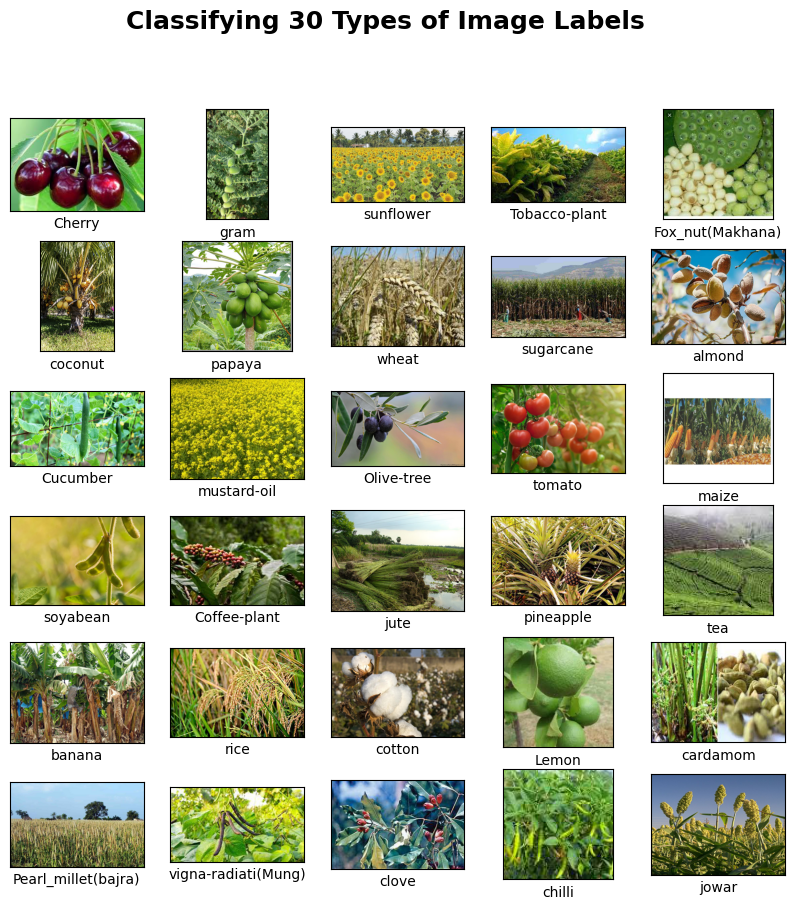

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(vis_labels)):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = mpimg.imread(vis_images[i])
    plt.imshow(img)
    plt.xlabel(vis_labels[i])
    plt.suptitle(f"Classifying {len_labels} Types of Image Labels",fontsize=18, fontweight='bold')
plt.show()

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    selected_file_names = []
    all_file_names = os.listdir(SOURCE_DIR)
    for file_name in all_file_names:
        file_path = os.path.join(SOURCE_DIR, file_name)
        size = os.path.getsize(file_path)
        if size != 0:
              selected_file_names.append(file_name)
        else:
              print(f"{file_name} is zero length, so ignoring.")

    random.seed(42)
    selected_train_files = random.sample(selected_file_names, int(SPLIT_SIZE * len(selected_file_names)))
    selected_val_files = [x for x in selected_file_names if x not in selected_train_files]
    for file_name in selected_train_files:
        source = os.path.join(SOURCE_DIR, file_name)
        destination = os.path.join(TRAINING_DIR, file_name)
        copyfile(source, destination)

    for file_name in selected_val_files:
        source = os.path.join(SOURCE_DIR, file_name)
        destination = os.path.join(VALIDATION_DIR, file_name)
        copyfile(source, destination)

In [ ]:
def create_train_val_dirs(root_path, split_size = 0.9):
    for item in directories_list:
        source_dir = os.path.join(base_dir, item)
        training_dir = os.path.join(root_path, f'_MODELLING/training/{item}')
        validation_dir = os.path.join(root_path, f'_MODELLING/validation/{item}')

        # Create EMPTY directory
        os.makedirs(training_dir)
        os.makedirs(validation_dir)
        
        split_data(source_dir, training_dir, validation_dir, split_size)
    print(f"Created training and validation directories containing images at split size of {split_size}")

In [ ]:
create_train_val_dirs('/kaggle/working', split_size = 0.9)

Created training and validation directories containing images at split size of 0.9


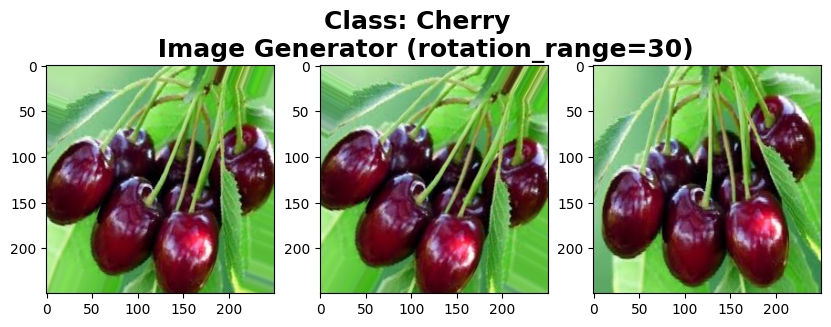

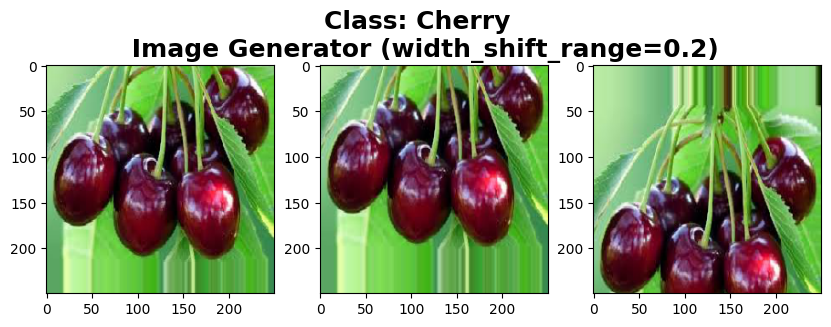

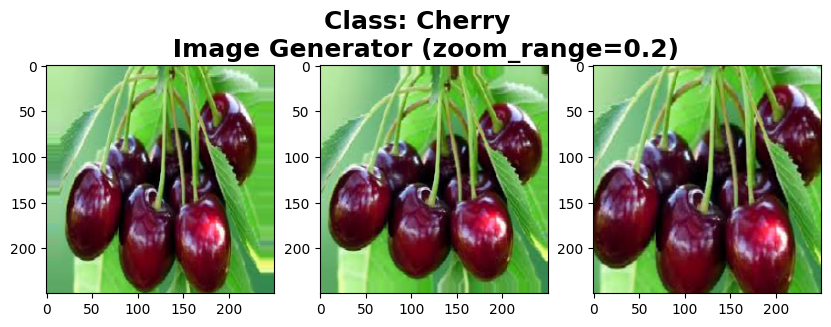

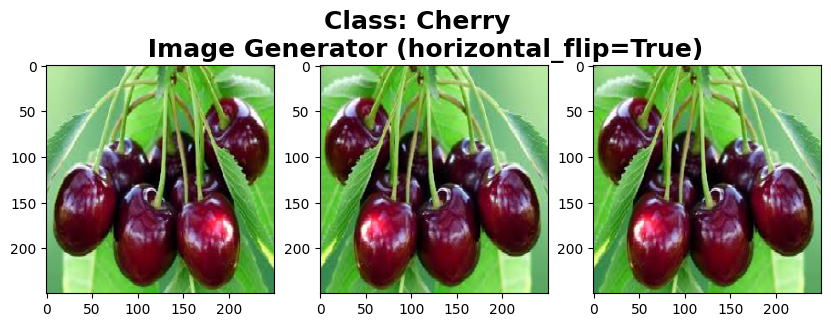

In [ ]:
def show_ImageDataGenerator(vis_images, vis_labels, image_index):
    #Loads image in from the set image path
    class_label = vis_labels[image_index]
    img = tf.keras.preprocessing.image.load_img(vis_images[image_index], target_size= (250,250))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    #Creates our batch of one image
    def show_image(datagen, param):
        pic = datagen.flow(img_tensor, batch_size =1)
        plt.figure(figsize=(10,3.5))
        #Plots our figures
        for i in range(1,4):
            plt.subplot(1, 3, i)
            batch = pic.next()
            image_ = batch[0].astype('uint8')
            plt.imshow(image_)
        plt.suptitle(f"Class: {class_label} \n Image Generator ({param})",fontsize=18, fontweight='bold')

        plt.show()

    datagen = ImageDataGenerator(rotation_range=30)
    show_image(datagen, "rotation_range=30")

    datagen = ImageDataGenerator(width_shift_range=0.2)
    show_image(datagen, "width_shift_range=0.2")

    datagen = ImageDataGenerator(zoom_range=0.2)
    show_image(datagen, "zoom_range=0.2")

    datagen = ImageDataGenerator(horizontal_flip=True)
    show_image(datagen, "horizontal_flip=True")
show_ImageDataGenerator(vis_images, vis_labels, image_index = 0)


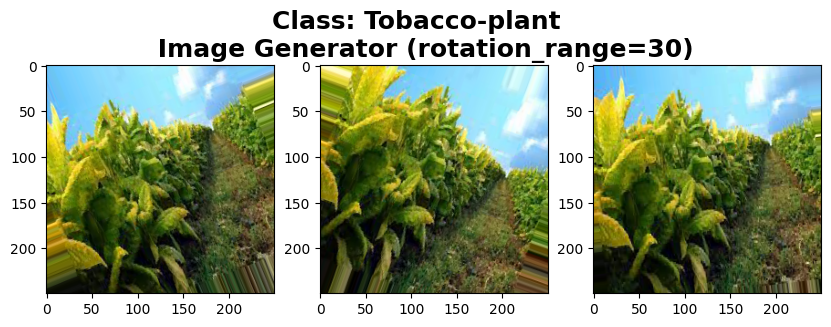

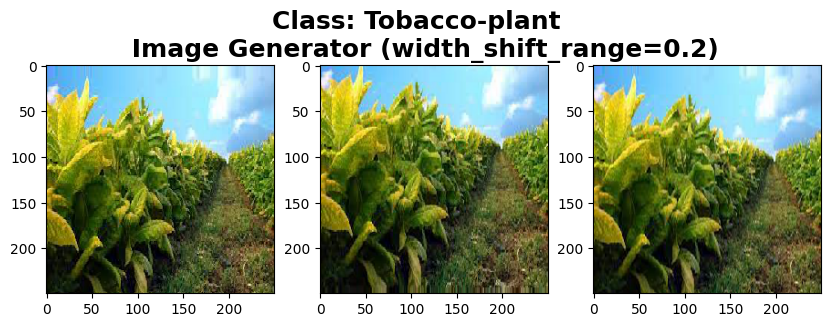

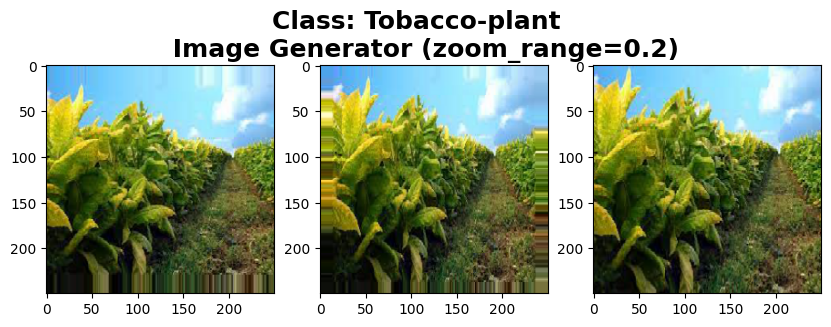

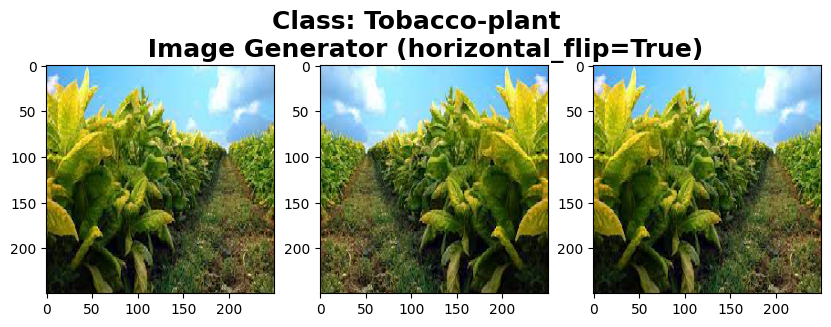

In [ ]:
show_ImageDataGenerator(vis_images, vis_labels, image_index = 3)


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

    # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
    train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=30,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
 # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))


    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
    return train_generator, validation_generator

In [ ]:
training_dir = os.path.join('/kaggle/working', '_MODELLING', 'training')
validation_dir = os.path.join('/kaggle/working', '_MODELLING', 'validation')

print(validation_dir)

/kaggle/working/_MODELLING/validation


In [ ]:
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 731 images belonging to 30 classes.
Found 98 images belonging to 30 classes.


In [ ]:
model_1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(len_labels, activation='softmax')
])
# Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dropout (Dropout)           (None, 82944)             0

In [ ]:
# Define a Callback class that stops training once accuracy reaches 80%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.8):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=callbacks)

Epoch 1/20
23/23 [==============================] - 24s 525ms/step - loss: 4.1336 - accuracy: 0.0369 - val_loss: 3.3568 - val_accuracy: 0.0612
Epoch 2/20
23/23 [==============================] - 12s 504ms/step - loss: 3.2559 - accuracy: 0.0876 - val_loss: 3.0461 - val_accuracy: 0.1429
Epoch 3/20
23/23 [==============================] - 12s 506ms/step - loss: 2.9896 - accuracy: 0.1628 - val_loss: 2.6823 - val_accuracy: 0.2347
Epoch 4/20
23/23 [==============================] - 12s 509ms/step - loss: 2.8040 - accuracy: 0.1943 - val_loss: 2.7135 - val_accuracy: 0.1531
Epoch 5/20
23/23 [==============================] - 11s 500ms/step - loss: 2.7596 - accuracy: 0.1929 - val_loss: 2.8874 - val_accuracy: 0.1837
Epoch 6/20
23/23 [==============================] - 13s 575ms/step - loss: 2.5998 - accuracy: 0.2216 - val_loss: 2.8039 - val_accuracy: 0.1837
Epoch 7/20
23/23 [==============================] - 12s 508ms/step - loss: 2.5503 - accuracy: 0.2421 - val_loss: 2.4989 - val_accuracy: 0.2959

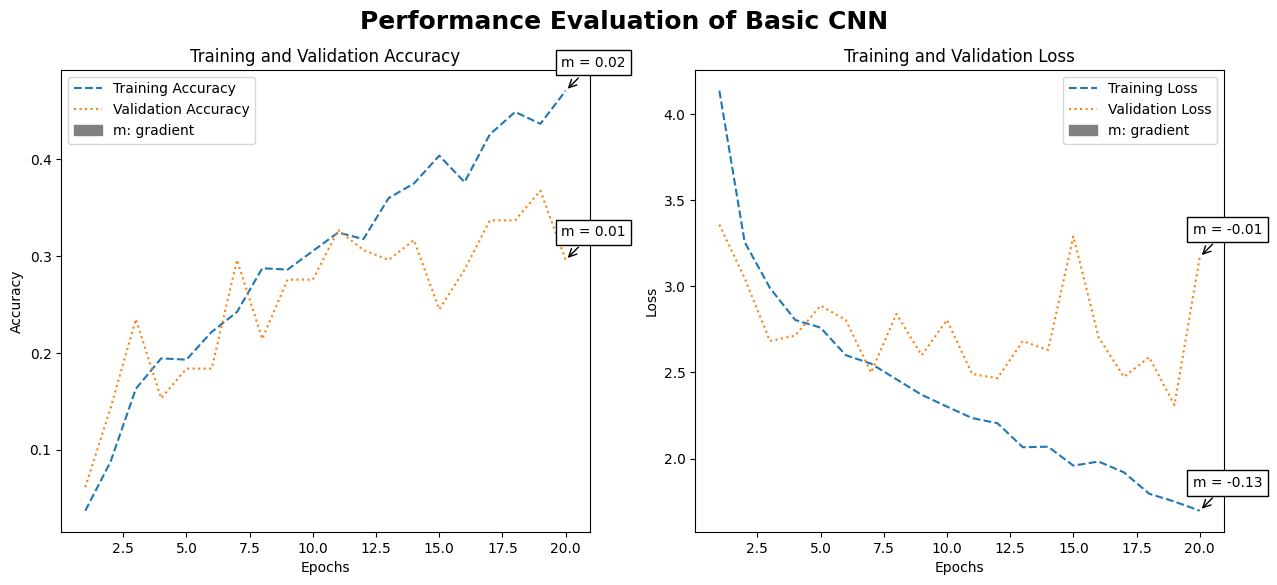

In [ ]:
def vis_evaluation(history_dict, model_name):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    epochs = range(1, len(history_dict['accuracy'])+1)

    def get_gradient(y_arr, epochs):
        return round((y_arr[-1] - y_arr[0]) / (epochs[-1] - epochs[0]),2)

    def vis_sub_evaluation(n, Accuracy, train_acc, val_acc, epochs):
        axs[n].plot(epochs, train_acc, label=f'Training {Accuracy}', ls='--')
        axs[n].plot(epochs, val_acc, label=f'Validation {Accuracy}', ls='dotted')

        axs[n].set_title(f'Training and Validation {Accuracy}')
        axs[n].set_xlabel('Epochs')
        axs[n].set_ylabel(Accuracy)
        handles, labels = axs[n].get_legend_handles_labels()
        m_patch = mpatches.Patch(color='grey',label='m: gradient')
        handles.append(m_patch) 
        axs[n].legend(handles=handles)
        
        def annotate_box(train_acc):
            return AnnotationBbox(TextArea(f"m = {get_gradient(train_acc, epochs)}"), (epochs[-1], train_acc[-1]),
                            xybox=(20, 20),
                            xycoords='data',
                            boxcoords="offset points",
                            arrowprops=dict(arrowstyle="->"))
        axs[n].add_artist(annotate_box(train_acc))
        axs[n].add_artist(annotate_box(val_acc))

    train_acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    vis_sub_evaluation(0, 'Accuracy', train_acc, val_acc, epochs)

    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    vis_sub_evaluation(1, 'Loss', train_loss, val_loss, epochs)
    
    plt.suptitle(f"Performance Evaluation of {model_name}",fontsize=18, fontweight='bold')
    plt.show()
    
history_dict_1 = history_1.history
vis_evaluation(history_dict_1, 'Basic CNN')

In [ ]:
## Transfer Learning VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(include_top=False,weights='imagenet', input_shape=(150, 150, 3))
for layer in pre_trained_model.layers:
    layer.trainable = False
    
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

58889256/58889256 [==============================] - 2s 0us/step
There are 14,714,688 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
last_output = pre_trained_model.output
print('last layer output: ', last_output)

# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")
The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [ ]:
from tensorflow.keras import Model
def transfer_learning(last_output, pre_trained_model):
    # Flatten the output layer to 1 dimension
    x = tf.keras.layers.Flatten()(last_output)
    # Add a fully connected layer with 1024 hidden units and ReLU activation
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    # Add a dropout rate of 0.3
    x = tf.keras.layers.Dropout(0.3)(x)  
    # Add a final sigmoid layer for classification
    x = tf.keras.layers.Dense(len_labels, activation='softmax')(x)          
    # Create the complete model by using the Model class
    model = Model(inputs=pre_trained_model.input, outputs=x)
    
    return model

In [ ]:
model_2 = transfer_learning(last_output, pre_trained_model)
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])
history_2 = model_2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks=callbacks)

Epoch 1/20
23/23 [==============================] - 19s 644ms/step - loss: 4.5439 - accuracy: 0.0889 - val_loss: 2.9318 - val_accuracy: 0.2143
Epoch 2/20
23/23 [==============================] - 12s 517ms/step - loss: 2.7618 - accuracy: 0.2421 - val_loss: 2.4105 - val_accuracy: 0.3163
Epoch 3/20
23/23 [==============================] - 12s 518ms/step - loss: 2.4417 - accuracy: 0.3215 - val_loss: 2.2571 - val_accuracy: 0.3878
Epoch 4/20
23/23 [==============================] - 12s 551ms/step - loss: 2.2105 - accuracy: 0.3803 - val_loss: 2.0406 - val_accuracy: 0.5000
Epoch 5/20
23/23 [==============================] - 12s 529ms/step - loss: 2.0602 - accuracy: 0.3926 - val_loss: 2.0552 - val_accuracy: 0.4490
Epoch 6/20
23/23 [==============================] - 12s 527ms/step - loss: 1.9026 - accuracy: 0.4432 - val_loss: 1.9275 - val_accuracy: 0.4490
Epoch 7/20
23/23 [==============================] - 12s 517ms/step - loss: 1.7285 - accuracy: 0.4938 - val_loss: 1.8694 - val_accuracy: 0.4694

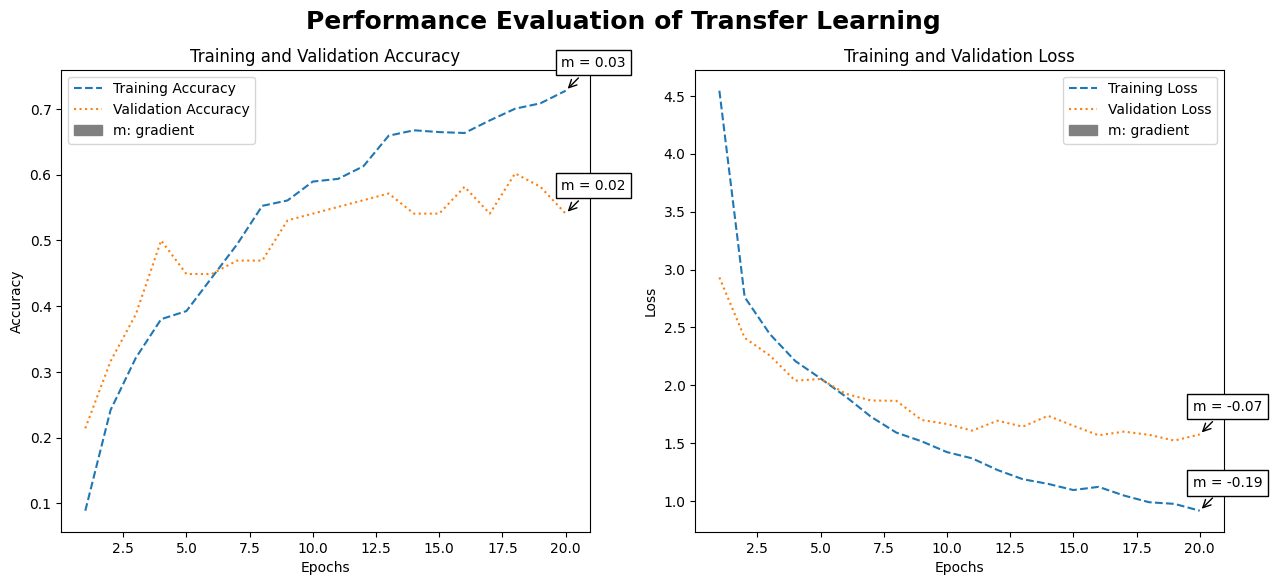

In [ ]:
history_dict_2 = history_2.history
vis_evaluation(history_dict_2, 'Transfer Learning')